In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [2]:
def plot(X, y=None):
    assert X.ndim == 2
    x0,x1 = X.T
    if y is None:
        plt.scatter(x0, x1, edgecolors='w')
    else:
        plt.scatter(x0, x1, c=y, edgecolors='w')
    plt.rcParams["figure.figsize"] = (10,10)
    plt.grid()
    plt.show()

In [3]:
from sklearn.datasets import make_classification

def make_data(n_samples):
    X,y = make_classification(
        n_samples=n_samples, 
        n_features=2, 
        n_informative=2, 
        n_redundant=0, 
        n_repeated=0,
        n_classes=2, 
        n_clusters_per_class=2,
        class_sep=.7,
        flip_y=0.2,
        weights=[0.5,0.5], 
        random_state=233)
    return X,y

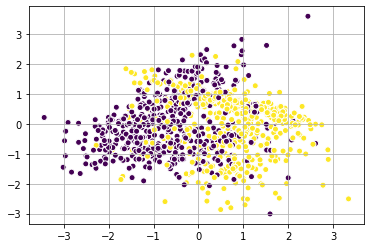

In [4]:
X,y = make_data(n_samples=1000)
plot(X,y)

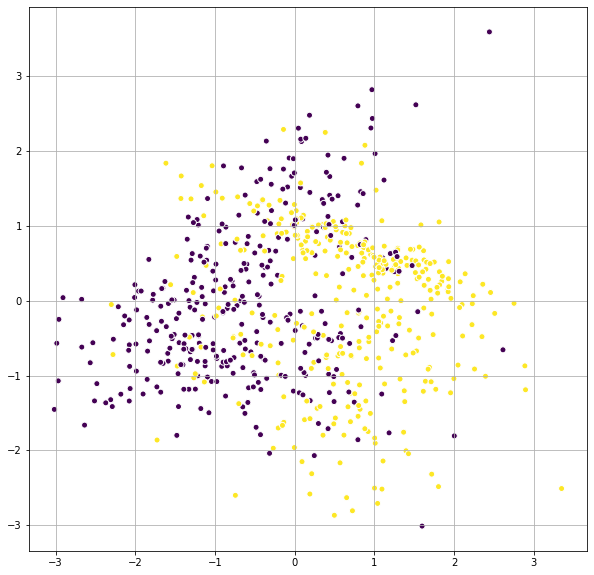

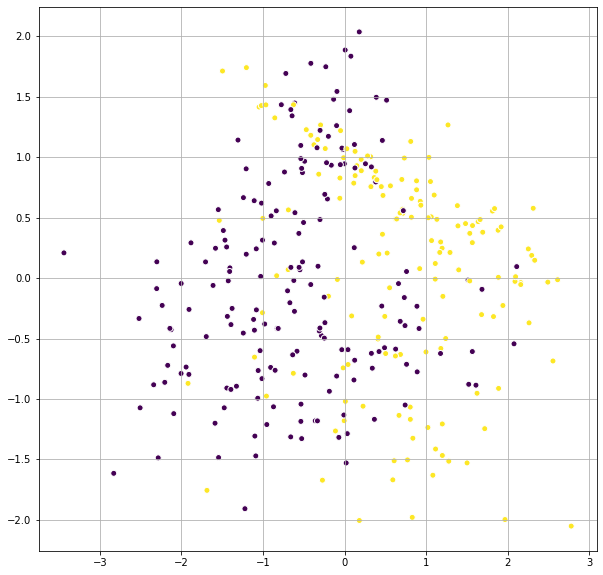

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plot(X_train,y_train)
plot(X_test,y_test)

In [6]:
# distance

from scipy.spatial import distance
data_mtx1 = [(1, 1),(2, 1),(1, 2),(2, 2)]
data_mtx2 = [(10, 10),(20, 10),(10, 20),(20, 20)]
D1 = distance.cdist(data_mtx1, data_mtx1)
D2 = distance.cdist(data_mtx1, data_mtx2)
print('Distance of each sample from other samples in the same data matrix')
print(D1)
print()
print('Distance of each sample in data_mtx1 from other samples in data_mtx2')
print(D2)

Distance of each sample from other samples in the same data matrix
[[0.         1.         1.         1.41421356]
 [1.         0.         1.41421356 1.        ]
 [1.         1.41421356 0.         1.        ]
 [1.41421356 1.         1.         0.        ]]

Distance of each sample in data_mtx1 from other samples in data_mtx2
[[12.72792206 21.02379604 21.02379604 26.87005769]
 [12.04159458 20.1246118  20.61552813 26.17250466]
 [12.04159458 20.61552813 20.1246118  26.17250466]
 [11.3137085  19.6977156  19.6977156  25.45584412]]


In [7]:
# argsort 

import numpy as np

mtx = np.random.randint(10, size=(5,3))
print('Original data')
print(mtx)
print()
print('the sorted indices, i.e. considering the elements in the order specified by the indices one obtains a sorted array')
ids = np.argsort(mtx, axis=1)
print(ids)
print('Make sure to understand the notion of axis')

Original data
[[8 7 1]
 [3 4 0]
 [9 3 5]
 [1 3 4]
 [2 7 3]]

the sorted indices, i.e. considering the elements in the order specified by the indices one obtains a sorted array
[[2 1 0]
 [2 0 1]
 [1 2 0]
 [0 1 2]
 [0 2 1]]
Make sure to understand the notion of axis


In [8]:
# mode
import scipy as sp
mtx = np.random.randint(5, size=(3,10))
print('Original data')
print(mtx)
print()
print('the mode, i.e. most frequent element')
print(sp.stats.mode(mtx, axis=1))

A,B = sp.stats.mode(mtx, axis=1)
print('Values')
print(A)
print()
print('Counts')
print(B)

Original data
[[3 3 0 0 0 2 4 1 4 4]
 [3 0 0 2 0 1 3 1 1 1]
 [2 0 0 2 0 2 0 4 2 0]]

the mode, i.e. most frequent element
ModeResult(mode=array([[0],
       [1],
       [0]]), count=array([[3],
       [4],
       [5]]))
Values
[[0]
 [1]
 [0]]

Counts
[[3]
 [4]
 [5]]


In [9]:
def predict_knn(X_test, X_train, y_train, k):
    D = distance.cdist(X_test, X_train)
    ids = np.argsort(D, axis=1)
    id_neigs = ids[:,:k]
    preds = y_train[id_neigs]
    values, counts = sp.stats.mode(preds, axis=1)
    avg_preds = values.reshape(-1)
    return avg_preds

In [10]:
def make_grid(X, n_samples):
    assert X.ndim==2
    mins = np.min(X,axis=0)
    maxs = np.max(X,axis=0)
    n_samples_per_side = int(np.sqrt(n_samples))
    data_mtx = []
    for x0 in np.linspace(mins[0],maxs[0], n_samples_per_side):
        for x1 in np.linspace(mins[1],maxs[1], n_samples_per_side):
            data_mtx.append([x0,x1])
    data_mtx = np.vstack(data_mtx)
    return data_mtx

In [11]:
def plot_decision_surface(X,y,X_grid,yg):
    assert X.ndim == 2 and X_grid.ndim==2
    x0,x1 = X.T
    g0,g1 = X_grid.T
    plt.scatter(g0,g1,c=yg,alpha=.3)
    plt.scatter(x0,x1,c=y,edgecolor='k')
    plt.grid()
    plt.show()

In [12]:
X_grid = make_grid(X, n_samples=40000)

In [13]:
y_pred = predict_knn(X_grid, X_train, y_train, k=10)

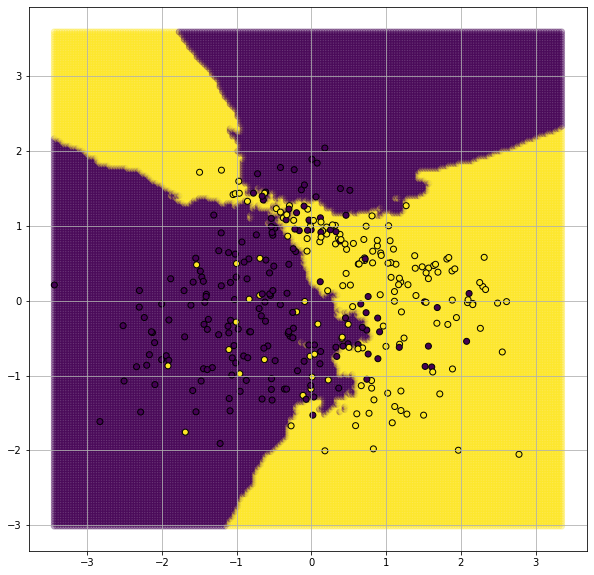

In [14]:
yg = predict_knn(X_grid, X_train, y_train, k=10)
plot_decision_surface(X_test,y_test,X_grid,yg)

## scikit learn

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
neigh = KNeighborsClassifier(10)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [17]:
pred = neigh.predict(X_grid)

In [18]:
def make_grid(X, n_samples):
    assert X.ndim==2
    mins = np.min(X,axis=0)
    maxs = np.max(X,axis=0)
    n_samples_per_side = int(np.sqrt(n_samples))
    data_mtx = []
    for x0 in np.linspace(mins[0],maxs[0], n_samples_per_side):
        for x1 in np.linspace(mins[1],maxs[1], n_samples_per_side):
            data_mtx.append([x0,x1])
    data_mtx = np.vstack(data_mtx)
    return data_mtx
def plot_decision_surface(X,y,X_grid,yg):
    assert X.ndim == 2 and X_grid.ndim==2
    x0,x1 = X.T
    g0,g1 = X_grid.T
    plt.scatter(g0,g1,c=yg,alpha=.3)
    plt.scatter(x0,x1,c=y,edgecolor='k')
    plt.grid()
    plt.show()

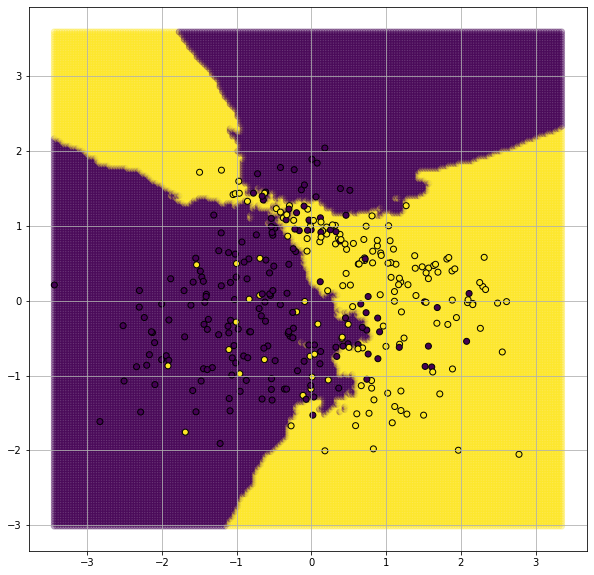

In [19]:
plot_decision_surface(X_test,y_test,X_grid,pred)